In [45]:
import pandas as pd
import numpy as np

**Loading the Dataset**

In [46]:
# loading Data set
df_2016=pd.read_csv(r"All years\2016.csv")

In [47]:
df_2016.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [48]:
print("Total participants involved in 2016 survey : {0}".format(df_2016.shape[0])) #number of rows
print("Total questions in 2016 survey : {0}".format(df_2016.shape[1])) #number of columns

Total participants involved in 2016 survey : 1433
Total questions in 2016 survey : 63


In [49]:
#printing the columns
df_2016.columns 

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

**Data Cleaning**

In [50]:
#Renaming the columns
# Column rename
renamed_columns = ['self_employed', 'number_of_employees', 'company_in_tech', 'role_in_tech', 'company_mental_health',
                  'company_mental_health_options_awareness', 'company_mental_health_discussion', 'company_mental_health_resources', 
                   'company_mental_health_anonymity','company_mental_health_leave', 'company_mental_health_discussion_impact', 
                   'company_physical_health_discussion_negative_impact', 'mental_health_coworkers_discussion',
                   'mental_health_supervisor_discussion', 'company_mental_health_serious', 
                   'company_mental_health_coworker_discussion_negative_impact', 'mental_health_coverage', 'mental_health_online_resources',
                  'mental_health_diagnosed_reveal', 'mental_health_diagnosed_reveal_impact', 'mental_health_diagnosed_coworker_reveal', 
                   'mental_health_diagnosed_coworker_reveal_impact_negative','mental_health_productivity_impact', 
                   'mental_health_productivity_impact_percent', 'previous_companies', 'previous_companies_mental_health_benefits', 
                   'previous_companies_mental_health_benefits_awareness','previous_companies_mental_health_discussion', 
                   'previous_companies_mental_health_resources', 'previous_companies_mental_health_anonymity', 
                   'previous_companies_mental_health_discussion_negative_impact', 
                   'previous_companies_physical_health_discussion_negative_impact',
                  'previous_companies_mental_coworkers_health_discussion', 'previous_companies_mental_supervisor_health_discussion', 
                   'previous_company_mental_health_serious', 'previous_company_mental_health_coworker_discussion_negative_impact',
                  'future_company_physical_health_interview', 'why/why_not', 'future_company_mental_health_interview', 'why/why_not2', 
                   'mental_health_negative_impact_career', 'mental_health_negative_view_coworkers',
                  'mental_health_reveal_family&friends', 'previous_and_current_company_mental_health_bad_df_2016_experienced', 
                   'previous_and_current_company_mental_health_bad_df_2016_experienced_others', 'mental_health_family_history',
                  'mental_health_disorder_past', 'mental_health_disorder_current', 'yes:what_diagnosis', 'maybe:what_diagnosis', 
                   'mental_health_disorder_professional_diagnosis','yes:condition_diagnosed', 'mental_health_proffesional_treatment', 
                   'mental_health_treatment_affects_work', 'mental_health_no_treatment_affects_work','age', 'sex', 'country_live', 
                   'live_us_territory', 'country_work', 'work_us_territory', 'work_position', 'remote']
df_2016.columns = renamed_columns

df_2016.columns

Index(['self_employed', 'number_of_employees', 'company_in_tech',
       'role_in_tech', 'company_mental_health',
       'company_mental_health_options_awareness',
       'company_mental_health_discussion', 'company_mental_health_resources',
       'company_mental_health_anonymity', 'company_mental_health_leave',
       'company_mental_health_discussion_impact',
       'company_physical_health_discussion_negative_impact',
       'mental_health_coworkers_discussion',
       'mental_health_supervisor_discussion', 'company_mental_health_serious',
       'company_mental_health_coworker_discussion_negative_impact',
       'mental_health_coverage', 'mental_health_online_resources',
       'mental_health_diagnosed_reveal',
       'mental_health_diagnosed_reveal_impact',
       'mental_health_diagnosed_coworker_reveal',
       'mental_health_diagnosed_coworker_reveal_impact_negative',
       'mental_health_productivity_impact',
       'mental_health_productivity_impact_percent', 'previous_comp

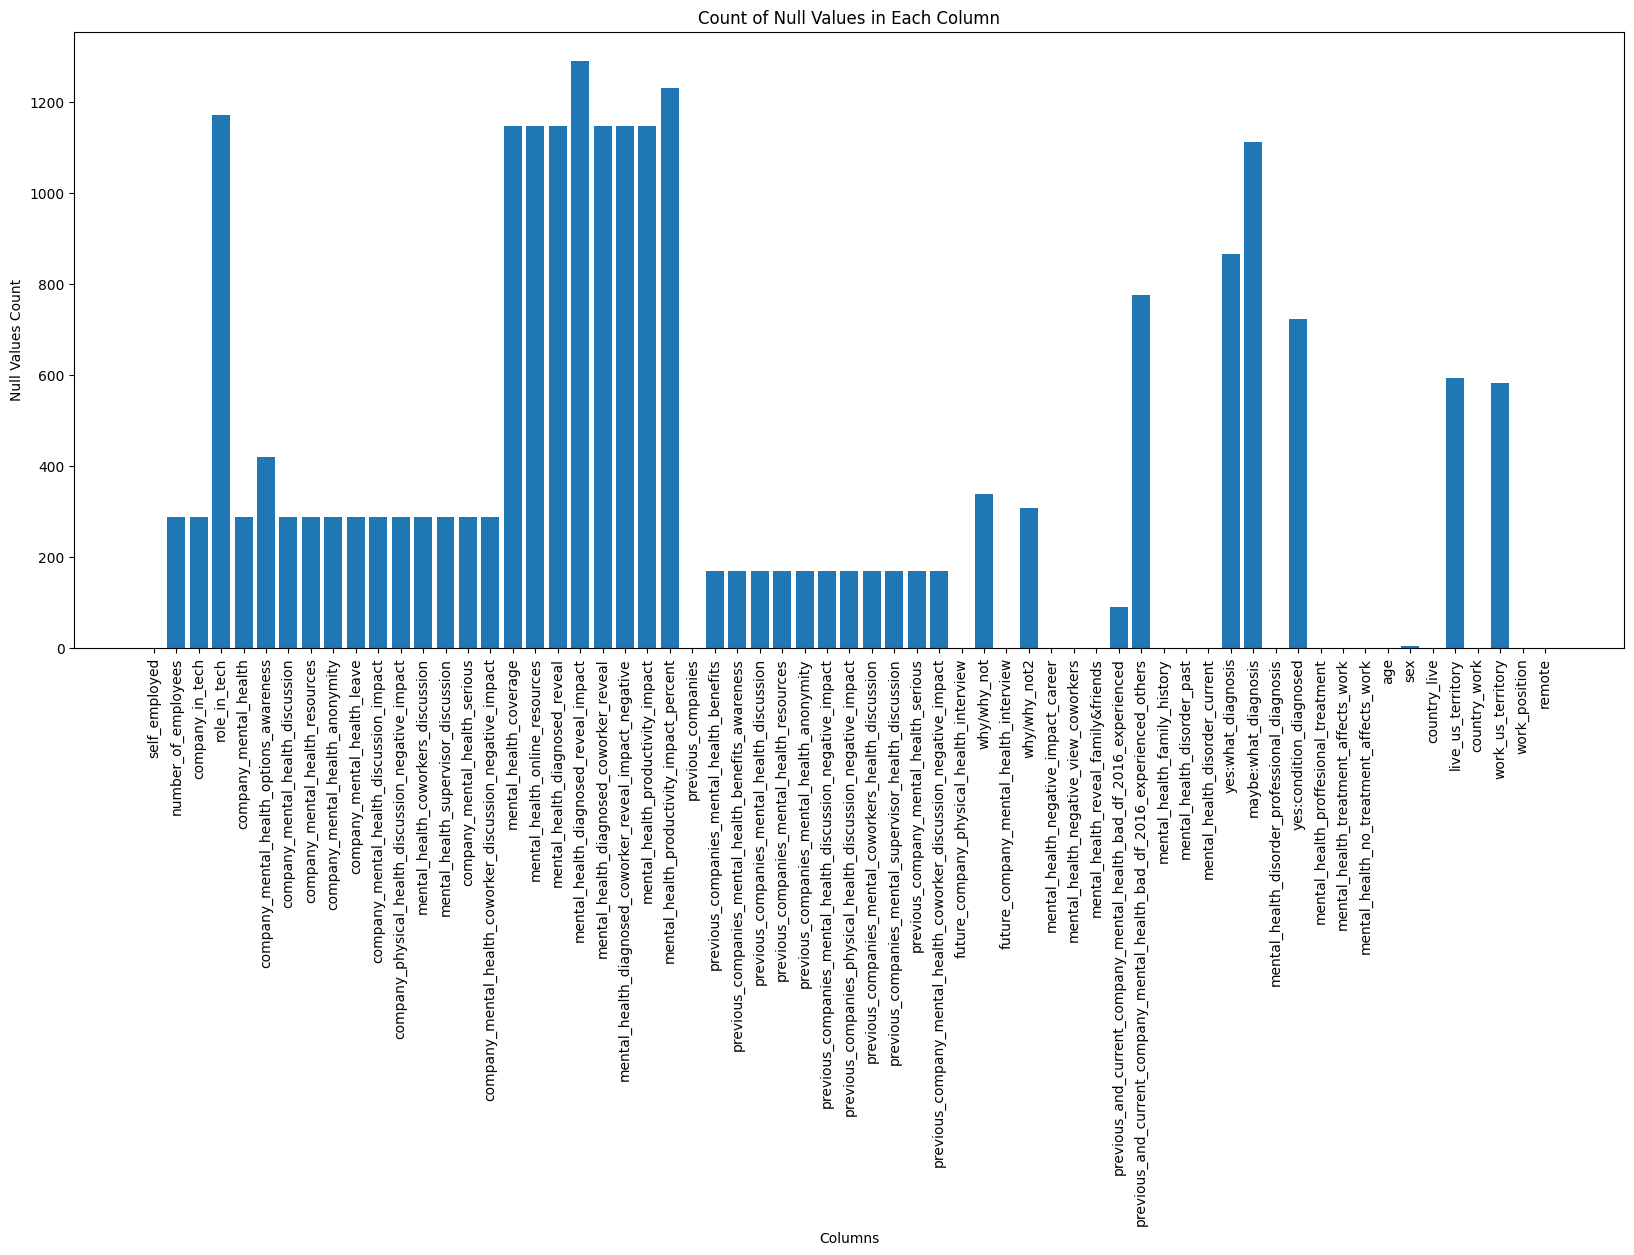

In [51]:
# Null Values
import matplotlib.pyplot as plt
plt.figure(figsize=[20,8])
plt.bar(df_2016.columns,df_2016.isnull().sum())
plt.title("Count of Null Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Null Values Count")
plt.xticks(rotation=90)
plt.show()

Text(170.72222222222223, 0.5, 'Count of Null Values')

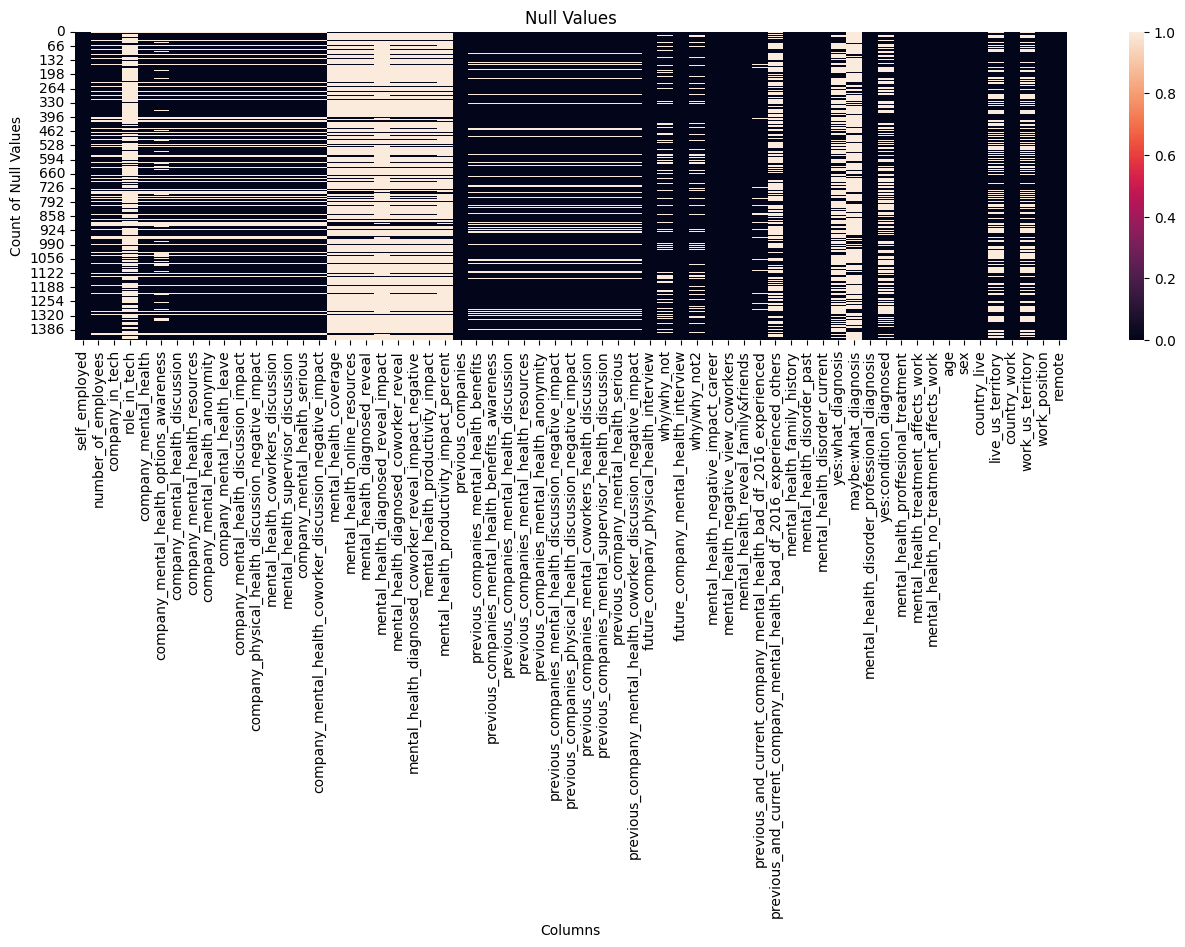

In [52]:
import seaborn as sns
plt.figure(figsize = (16,4))
sns.heatmap(data = df_2016.isna())
plt.title("Null Values")
plt.xlabel("Columns")
plt.ylabel("Count of Null Values")

In [53]:
df_2016.number_of_employees.value_counts()

26-100            292
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: number_of_employees, dtype: int64

In [54]:
df_2016['number_of_employees'].replace(to_replace = ['More than 1000'], value = '>1000', inplace = True)

In [55]:
df_2016.number_of_employees.value_counts()

26-100      292
>1000       256
100-500     248
6-25        210
500-1000     80
1-5          60
Name: number_of_employees, dtype: int64

In [56]:
df_2016.remote.value_counts()

Sometimes    757
Always       343
Never        333
Name: remote, dtype: int64

In [57]:
df_2016.sex.unique()

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'female ', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'Woman', 'man', 'fm', 'f',
       'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', nan, 'Male (cis)', 'Other',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'none of your business', 'genderqueer', 'cis male', 'Human',
       'Genderfluid', 'Enby', 'Malr', 'genderqueer woman', 'mtf', 'Queer',
       'Agender', 'Dude', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'fem', 'Nonbinary', 'male ',
       'human', 'Female (props for making th

In [58]:
df_2016.sex.unique().shape

(71,)

In [59]:
#recoding the 'sex' column using the concept of one hot encoding
df_2016['sex'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 'Male', inplace = True)

df_2016['sex'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 'Female', inplace = True)

df_2016['sex'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman'], value = 'Others', inplace = True)

In [60]:
df_2016["mental_health_disorder_current"]

0          No
1         Yes
2          No
3         Yes
4         Yes
        ...  
1428       No
1429       No
1430    Maybe
1431      Yes
1432      Yes
Name: mental_health_disorder_current, Length: 1433, dtype: object

In [61]:
import plotly.express as px

fig = px.violin(df_2016, y="age", x="mental_health_disorder_current", color="sex", box=True, points="all")
fig.show()

In [62]:
df_2016.sex.unique()

array(['Male', 'Female', 'Others', nan], dtype=object)

In [63]:
df_2016.sex.value_counts().shape

(3,)

In [64]:
df_2016 = pd.get_dummies(df_2016, columns = ['sex'], drop_first=True)

In [65]:
df_2016.columns

Index(['self_employed', 'number_of_employees', 'company_in_tech',
       'role_in_tech', 'company_mental_health',
       'company_mental_health_options_awareness',
       'company_mental_health_discussion', 'company_mental_health_resources',
       'company_mental_health_anonymity', 'company_mental_health_leave',
       'company_mental_health_discussion_impact',
       'company_physical_health_discussion_negative_impact',
       'mental_health_coworkers_discussion',
       'mental_health_supervisor_discussion', 'company_mental_health_serious',
       'company_mental_health_coworker_discussion_negative_impact',
       'mental_health_coverage', 'mental_health_online_resources',
       'mental_health_diagnosed_reveal',
       'mental_health_diagnosed_reveal_impact',
       'mental_health_diagnosed_coworker_reveal',
       'mental_health_diagnosed_coworker_reveal_impact_negative',
       'mental_health_productivity_impact',
       'mental_health_productivity_impact_percent', 'previous_comp

In [66]:
df_2016.country_live.value_counts()

United States of America    840
United Kingdom              180
Canada                       78
Germany                      58
Netherlands                  48
Australia                    35
Sweden                       19
France                       16
Ireland                      15
Switzerland                  10
Brazil                       10
New Zealand                   9
India                         9
Russia                        9
Bulgaria                      7
Finland                       7
Denmark                       7
Italy                         5
Belgium                       5
South Africa                  4
Romania                       4
Spain                         4
Poland                        4
Austria                       4
Norway                        3
Pakistan                      3
Chile                         3
Czech Republic                3
Japan                         2
Israel                        2
Other                         2
Bosnia a

In [67]:
df_2016.country_work.value_counts() 

United States of America    851
United Kingdom              183
Canada                       74
Germany                      58
Netherlands                  47
Australia                    34
Sweden                       20
Ireland                      15
France                       14
Switzerland                  10
Brazil                       10
India                         9
Russia                        9
New Zealand                   9
Denmark                       7
Bulgaria                      7
Finland                       7
Belgium                       5
South Africa                  4
Poland                        4
Austria                       4
Czech Republic                3
Italy                         3
Chile                         3
Norway                        3
Romania                       3
Spain                         3
Other                         2
Bosnia and Herzegovina        2
Afghanistan                   2
Pakistan                      2
Israel  

In [68]:
#Recoding United States of America to USA and United Kingdom to UK in columns: country_live and country_work for simplicity
df_2016['country_live'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df_2016['country_live'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)
df_2016['country_work'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df_2016_2016['country_work'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)

In [69]:
df_2016.age.min() #minimum age

3

In [70]:
df_2016.age.max() #maximum age

323

In [71]:
df_2016.age.unique()

array([ 39,  29,  38,  43,  42,  30,  37,  44,  28,  34,  35,  52,  32,
        25,  31,  26,  33,  27,  36,  40,  46,  41,  45,  19,  21,  24,
        17,  23,  22,  51,  48,  55,  50,  49,  20,  54,  47,  56,  57,
        63,  99,  61, 323,  62,  53,  58,   3,  66,  59,  15,  65,  74,
        70], dtype=int64)

<AxesSubplot: ylabel='age'>

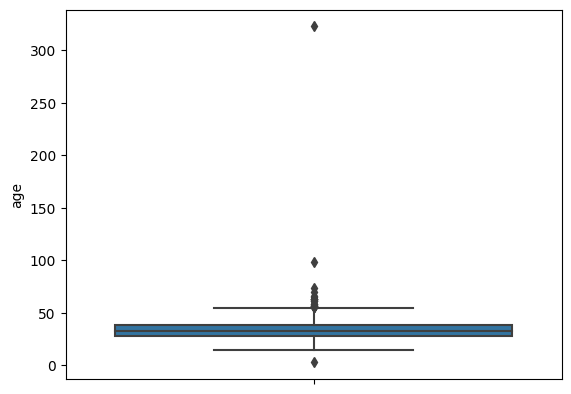

In [72]:
import seaborn as sns
sns.boxplot(data=df_2016, y='age')

In [73]:
mean_age = round(df_2016[(df_2016['age'] >= 21) | (df_2016['age'] <= 75)]['age'].mean(),0)
df_2016['age'].replace(to_replace = df_2016[(df_2016['age'] < 21) | (df_2016['age'] > 75)]['age'].tolist(),value = mean_age, inplace = True)

<AxesSubplot: ylabel='age'>

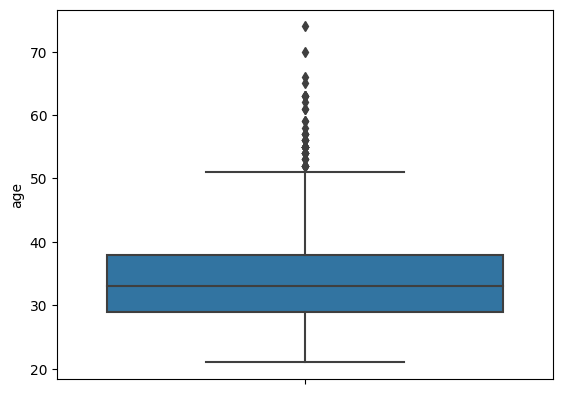

In [74]:
import seaborn as sns
sns.boxplot(data=df_2016, y='age')

<AxesSubplot: xlabel='age', ylabel='Count'>

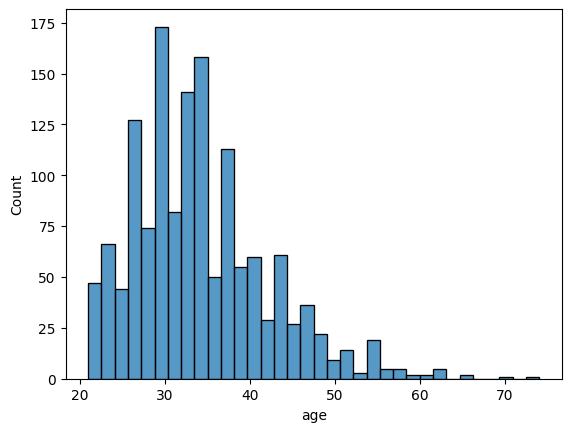

In [75]:
import seaborn as sns
sns.histplot(data=df_2016, x='age')

In [76]:
# import plotly.express as px

# fig = px.violin(df_2016, y="age", x="mental_Health", color="Gender", box=True, points="all")
# fig.show()

In [77]:
df_2016.age.unique()

array([39, 29, 38, 43, 42, 30, 37, 44, 28, 34, 35, 52, 32, 25, 31, 26, 33,
       27, 36, 40, 46, 41, 45, 21, 24, 23, 22, 51, 48, 55, 50, 49, 54, 47,
       56, 57, 63, 61, 62, 53, 58, 66, 59, 65, 74, 70], dtype=int64)

In [78]:
#finding the count of questions not answered by 70% of the people
count = 0
for col in list(df_2016):
        if(sum(pd.isnull(df_2016[col]))>430):
                count = count+1
print("\nTotal number of questions not answered by 70% of the people: ", count)




Total number of questions not answered by 70% of the people:  15


In [79]:
#dropping the columns not answered by the majority as shown above
drop_cols = []

for col in list(df_2016):
        if(sum(pd.isnull(df_2016[col]))>430):
                drop_cols.append(col)            

print(drop_cols)

df_2016.drop([i for i in drop_cols],axis=1,inplace=True)

['role_in_tech', 'mental_health_coverage', 'mental_health_online_resources', 'mental_health_diagnosed_reveal', 'mental_health_diagnosed_reveal_impact', 'mental_health_diagnosed_coworker_reveal', 'mental_health_diagnosed_coworker_reveal_impact_negative', 'mental_health_productivity_impact', 'mental_health_productivity_impact_percent', 'previous_and_current_company_mental_health_bad_df_2016_experienced_others', 'yes:what_diagnosis', 'maybe:what_diagnosis', 'yes:condition_diagnosed', 'live_us_territory', 'work_us_territory']


In [80]:
df_2016.shape[1] #we are left with 49 columns

49

In [81]:
df_2016.columns

Index(['self_employed', 'number_of_employees', 'company_in_tech',
       'company_mental_health', 'company_mental_health_options_awareness',
       'company_mental_health_discussion', 'company_mental_health_resources',
       'company_mental_health_anonymity', 'company_mental_health_leave',
       'company_mental_health_discussion_impact',
       'company_physical_health_discussion_negative_impact',
       'mental_health_coworkers_discussion',
       'mental_health_supervisor_discussion', 'company_mental_health_serious',
       'company_mental_health_coworker_discussion_negative_impact',
       'previous_companies', 'previous_companies_mental_health_benefits',
       'previous_companies_mental_health_benefits_awareness',
       'previous_companies_mental_health_discussion',
       'previous_companies_mental_health_resources',
       'previous_companies_mental_health_anonymity',
       'previous_companies_mental_health_discussion_negative_impact',
       'previous_companies_physical_hea

In [82]:
drop_columns = ['why/why_not', 'why/why_not2', 'work_position'] #dropping the why why not questions feature and work position column as this feature has 264 values
df_2016.drop(drop_columns, axis=1, inplace=True)


In [83]:
df_2016.self_employed.value_counts()
#287 people are self employed and this survey is meant for people who are working in the tech industries/organizations
#Hence, dropping the 'self_empl_flag' column

0    1146
1     287
Name: self_employed, dtype: int64

In [84]:
df_2016=df_2016[df_2016.self_employed!=1]

In [42]:
df_2016.shape

(1146, 46)

In [86]:
df_2016.drop(['self_employed'], axis=1, inplace=True)

In [88]:
df_2016.shape

(1146, 45)

In [89]:
df_2016.isnull().sum().sort_values(ascending=False)

company_mental_health_options_awareness                               133
previous_companies_mental_coworkers_health_discussion                 131
previous_companies_mental_health_benefits                             131
previous_company_mental_health_coworker_discussion_negative_impact    131
previous_company_mental_health_serious                                131
previous_companies_mental_supervisor_health_discussion                131
previous_companies_physical_health_discussion_negative_impact         131
previous_companies_mental_health_discussion_negative_impact           131
previous_companies_mental_health_anonymity                            131
previous_companies_mental_health_resources                            131
previous_companies_mental_health_discussion                           131
previous_companies_mental_health_benefits_awareness                   131
previous_and_current_company_mental_health_bad_df_2016_experienced     52
mental_health_reveal_family&friends   

In [90]:
# we see that there are mostly 131 NaN values in moost of the features. So dropping those rows with Nan values
count=0
for index,col in enumerate(list(df_2016)):
    idx=df_2016.index[df_2016[col].isnull()]
    if(len(idx)==131):
        k=idx
        count+=1

df_2016.drop(k,inplace=True)
df_2016.shape

(1015, 45)

In [91]:
df_2016

,number_of_employees,company_in_tech,company_mental_health,company_mental_health_options_awareness,company_mental_health_discussion,company_mental_health_resources,company_mental_health_anonymity,company_mental_health_leave,company_mental_health_discussion_impact,company_physical_health_discussion_negative_impact,...,mental_health_disorder_professional_diagnosis,mental_health_proffesional_treatment,mental_health_treatment_affects_work,mental_health_no_treatment_affects_work,age,country_live,country_work,remote,sex_Male,sex_Others
0,26-100,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,...,Yes,0,Not applicable to me,Not applicable to me,39,UK,UK,Sometimes,1,0
1,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,...,Yes,1,Rarely,Sometimes,29,USA,USA,Never,1,0
2,6-25,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,...,No,1,Not applicable to me,Not applicable to me,38,UK,UK,Always,1,0
4,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,...,Yes,1,Sometimes,Sometimes,43,USA,USA,Sometimes,0,0
5,>1000,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,...,No,1,Not applicable to me,Often,42,UK,UK,Sometimes,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,100-500,1.0,Yes,I am not sure,Yes,Yes,Yes,Somewhat easy,No,No,...,No,0,Rarely,Rarely,24,Canada,Canada,Sometimes,1,0
1426,100-500,1.0,I don't know,I am not sure,No,I don't know,I don't know,Somewhat easy,Maybe,No,...,Yes,1,Rarely,Often,26,Canada,Canada,Sometimes,0,0
1427,500-1000,1.0,Yes,No,No,No,Yes,Somewhat easy,No,No,...,Yes,1,Rarely,Often,38,USA,USA,Always,0,0
1430,100-500,1.0,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,Maybe,Maybe,...,Yes,1,Rarely,Sometimes,52,USA,USA,Sometimes,1,0


In [92]:
df_2016.columns.shape

(45,)

In [93]:
df_2016['number_of_employees'] = df_2016['number_of_employees'].replace('1-5', 5)
df_2016['number_of_employees'] = df_2016['number_of_employees'].replace('6-25',25)
df_2016['number_of_employees'] = df_2016['number_of_employees'].replace('26-100', 100)
df_2016['number_of_employees'] = df_2016['number_of_employees'].replace('100-500',500)
df_2016['number_of_employees'] = df_2016['number_of_employees'].replace('500-1000',1000)
df_2016['number_of_employees'] = df_2016['number_of_employees'].replace('More than 1000',5000)
df_2016['number_of_employees'] = df_2016['number_of_employees'].replace(np.nan,5)

In [94]:
df_2016['number_of_employees'] = df_2016['number_of_employees'].replace('>1000',1000)

In [95]:
df_2016.shape

(1015, 45)

In [96]:
columns=(list(df_2016))


In [97]:
df_2016.previous_companies_mental_health_anonymity.value_counts()

I don't know    672
Yes, always     135
Sometimes       107
No              101
Name: previous_companies_mental_health_anonymity, dtype: int64

In [98]:
numeric = {
    columns[2]:{'No':0, 'Yes':1, "I don't know":2, "Not eligible for coverage / N/A":3},
    columns[3]:{'Yes':1, 'I am not sure':2, 'No':0},
    columns[4]:{'No':0, 'Yes':1, "I don't know":2},
    columns[5]:{'No':0, 'Yes':1, "I don't know":2},
    columns[6]:{'No':0, 'Yes':1, "I don't know":2},
    columns[7]:{'Very easy':0 ,'Somewhat easy':1, 'Neither easy nor difficult':2,'Very difficult':-1,
 'Somewhat difficult':-2, "I don't know":2},
    columns[8]:{'No':0, 'Maybe':2, 'Yes':1},
    columns[9]:{'No':0, 'Maybe':2, 'Yes':1},
    columns[10]:{'No':0, 'Maybe':2, 'Yes':1},
    columns[11]:{'No':0, 'Maybe':2, 'Yes':1},
    columns[12]:{"I don't know":2, 'Yes':1, 'No':0},
    columns[13]:{'No':0, 'Yes':1},
    # columns[14]:{'No, none did':0, 'Yes, they all did':1, "I don't know":2, 'Some did':3},
    columns[15]:{"I don't know":2, 'Some did':3, 'None did':0, 'Yes, they all did':1},  ### MODIFIED DIRECTLY
columns[16]:{"I don't know":2, 'None did':0, 'Some did':3,'Yes, I was aware of all of them':1},
    columns[17]:{'None did':0, 'Some did':3, 'Yes, they all did':1, "I don't know":2},
    columns[18]:{'No, none did':0, 'Yes, they all did':1, "I don't know":2, 'Some did':3},
    columns[19]:{'Some of them':3, 'None of them':0, "I don't know":2, 'Yes, all of them':1},
    columns[20]:{'None of them':0, 'Some of them':3, 'Yes, all of them':1},
    columns[21]:{'Some of my previous employers':3, 'No, at none of my previous employers':0,
 'Yes, at all of my previous employers':1},
    columns[22]:{'Some of my previous employers':3, "I don't know":2, 'No, at none of my previous employers':0,
 'Yes, at all of my previous employers':1},
    columns[23]:{"I don't know":2, 'Some did':3, 'None did':0, 'Yes, they all did':1},
    columns[24]:{'None of them':0, 'Some of them':3, 'Yes, all of them':1},
    columns[25]:{'Maybe':2, 'Yes':1, 'No':0},
    columns[26]:{'Maybe':2, 'Yes':1, 'No':0},
    columns[27]:{'Maybe':2, "No, I don't think it would":0, 'Yes, I think it would':1,
 'No, it has not':0, 'Yes, it has':1},  ### MODIFIED DIRECTLY
    columns[28]:{"No, I don't think they would":0, 'Maybe':2, 'Yes, they do':1,'Yes, I think they would':1, 'No, they do not':0},  ## MODIFIED DIRECTLY
    columns[29]:{'Somewhat open':1, 'Not applicable to me (I do not have a mental illness)':4,
 'Very open':2, 'Not open at all':-2 ,'Neutral':0, 'Somewhat not open':-1}, ### MODIFIED DIRECTLY
    columns[30]:{'No':0, 'Maybe/Not sure':2, 'Yes, I experienced':1, 'Yes, I observed':1},
    columns[31]:{'No':0, 'Yes':1, "I don't know":2},
    columns[32]:{'Yes':1, 'Maybe':2, 'No':0},
    columns[33]:{'Yes':1, 'Maybe':2, 'No':0},
    columns[34]:{'Yes':1, 'No':0},
    columns[36]:{'Not applicable to me':4, 'Rarely':0, 'Sometimes':3, 'Never':0, 'Often':1},
    columns[37]:{'Not applicable to me':4, 'Sometimes':3, 'Often':1, 'Rarely':0, 'Never':0},
    columns[39]:{'Male':1, 'Female':0, 'Genderqueer/Other':2},
    columns[41]:{'Sometimes':3, 'Never':0, 'Always':1}
          }

In [ ]:
df_2016.replace(numeric, inplace=True)
df_2016.head()

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,...,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you work in?,Do you work remotely?
0,100,1.0,0,1,0,0,2,0,0,0,...,1,0,1,0,4,4,39,1,0,3
1,25,1.0,0,1,1,1,1,1,0,0,...,1,1,1,1,0,3,29,1,1,0
2,25,1.0,0,1,0,0,2,2,2,0,...,2,0,0,1,4,4,38,1,0,1
4,25,0.0,1,1,0,0,0,2,1,2,...,1,1,1,1,3,3,43,0,1,3
5,5000,1.0,1,2,0,1,1,1,1,1,...,0,1,0,1,4,1,42,1,0,3


In [ ]:
#Renaming the columns
# Column rename
renamed_columns = ['number_of_employees',
 'company_in_tech',
 'company_mental_health',
 'company_mental_health_options_awareness',
 'company_mental_health_discussion',
 'company_mental_health_resources',
 'company_mental_health_anonymity',
 'company_mental_health_leave',
 'company_mental_health_discussion_impact',
 'company_physical_health_discussion_negative_impact',
 'mental_health_coworkers_discussion',
 'mental_health_supervisor_discussion',
 'company_mental_health_serious',
 'company_mental_health_coworker_discussion_negative_impact',
 'previous_companies_mental_health_benefits',
 'previous_companies_mental_health_benefits_awareness',
 'previous_companies_mental_health_discussion',
 'previous_companies_mental_health_resources',
 'previous_companies_mental_health_anonymity',
 'previous_companies_mental_health_discussion_negative_impact',
 'previous_companies_physical_health_discussion_negative_impact',
 'previous_companies_mental_coworkers_health_discussion',
 'previous_companies_mental_supervisor_health_discussion',
 'previous_company_mental_health_serious',
 'previous_company_mental_health_coworker_discussion_negative_impact',
 'future_company_physical_health_interview',
 'future_company_mental_health_interview',
 'mental_health_negative_impact_career',
 'mental_health_negative_view_coworkers',
 'mental_health_reveal_family&friends',
 'mental_health_ignored_current_or_previous_employer',
 'mental_health_family_history',
 'mental_health_disorder_past',
 'mental_health_disorder_current',
 'diagnosised_with_mental_health',
 'yes:what_diagnosis',
 'mental_health_treatment_affects_work',
 'mental_health_no_treatment_affects_work',
 'age',
 'sex',
 'country_live',
 'remote_work']

In [ ]:
df_2016.columns = renamed_columns
df_2016.columns

Index(['number_of_employees', 'company_in_tech', 'company_mental_health',
       'company_mental_health_options_awareness',
       'company_mental_health_discussion', 'company_mental_health_resources',
       'company_mental_health_anonymity', 'company_mental_health_leave',
       'company_mental_health_discussion_impact',
       'company_physical_health_discussion_negative_impact',
       'mental_health_coworkers_discussion',
       'mental_health_supervisor_discussion', 'company_mental_health_serious',
       'company_mental_health_coworker_discussion_negative_impact',
       'previous_companies_mental_health_benefits',
       'previous_companies_mental_health_benefits_awareness',
       'previous_companies_mental_health_discussion',
       'previous_companies_mental_health_resources',
       'previous_companies_mental_health_anonymity',
       'previous_companies_mental_health_discussion_negative_impact',
       'previous_companies_physical_health_discussion_negative_impact',
      

C:\Users\mohit\AppData\Local\Temp\ipykernel_3056\2851282541.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


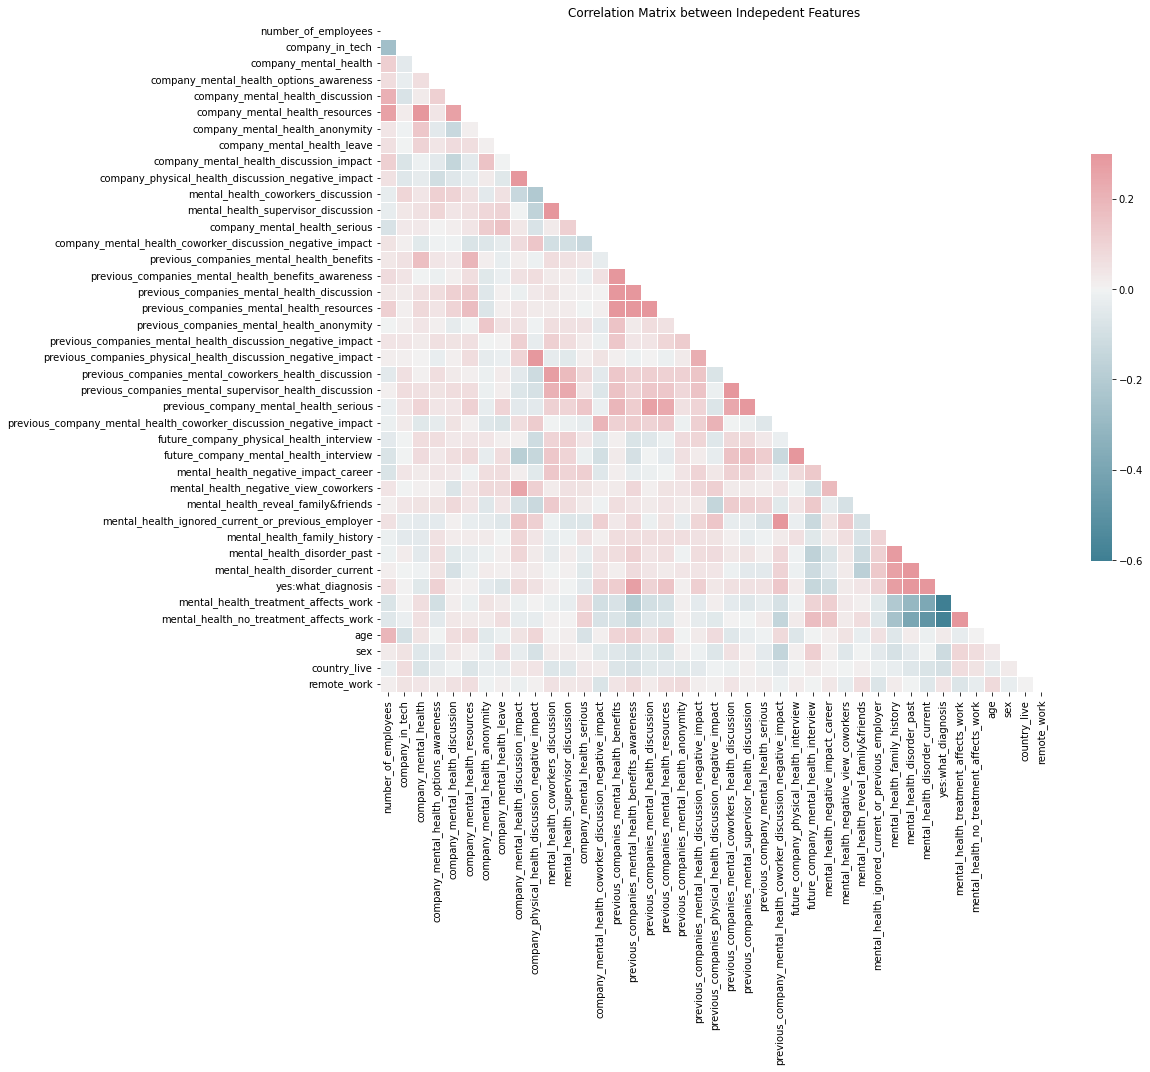

In [ ]:
# Finding Correlation
corr = df_2016.drop(['diagnosised_with_mental_health'], axis=1).corr(method ='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix between Indepedent Features")
plt.show()

C:\Users\mohit\AppData\Local\Temp\ipykernel_3056\2567713051.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


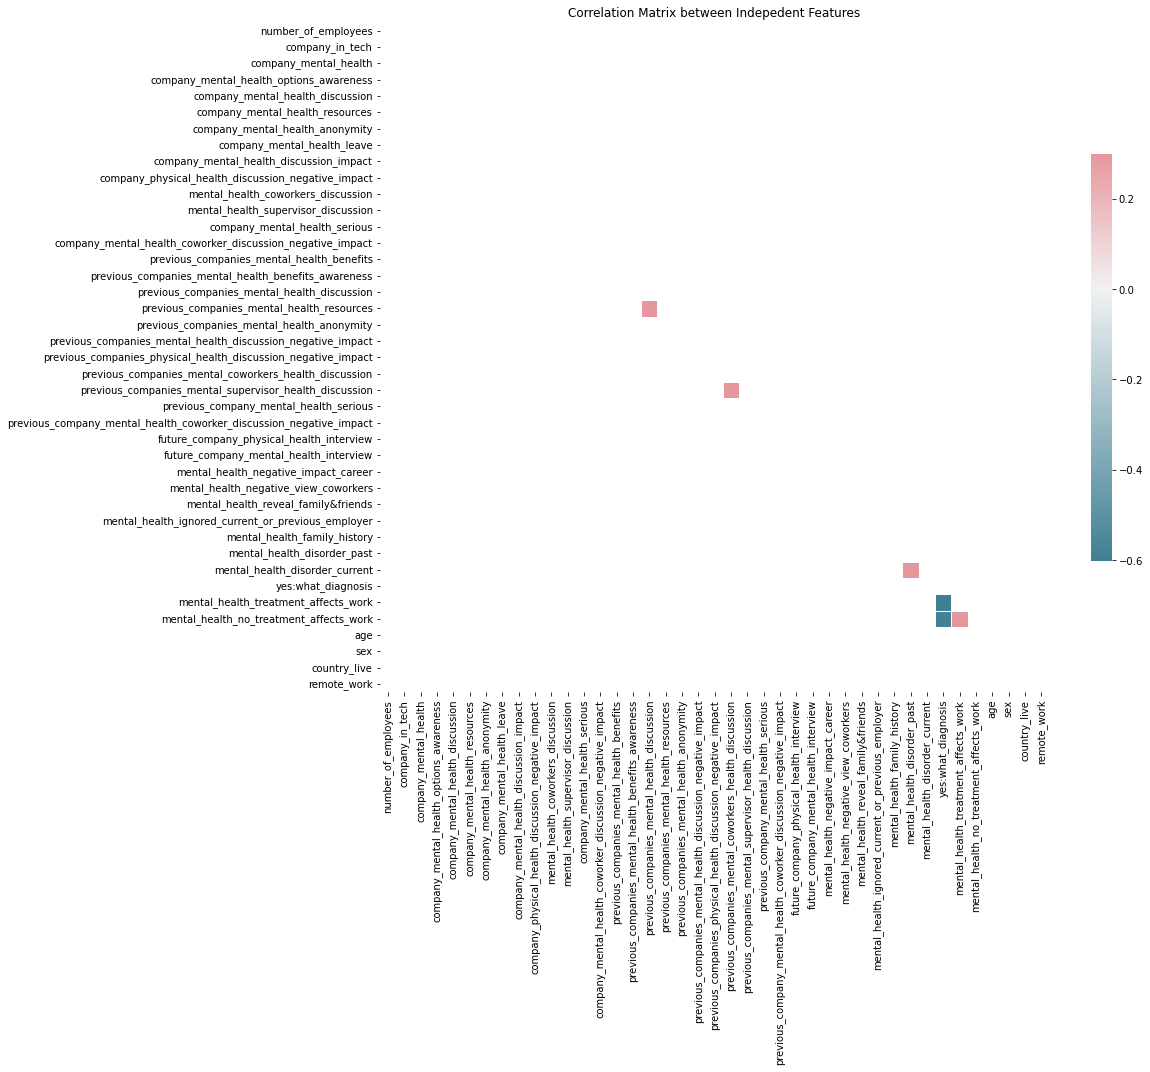

In [ ]:
# Finding Correlation
corr = df_2016.drop(['diagnosised_with_mental_health'], axis=1).corr(method ='spearman')
corr=corr[((corr >= .5) | (corr <= -.5)) & (corr !=1.000)]
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix between Indepedent Features")
plt.show()

<AxesSubplot:xlabel='number_of_employees', ylabel='age'>

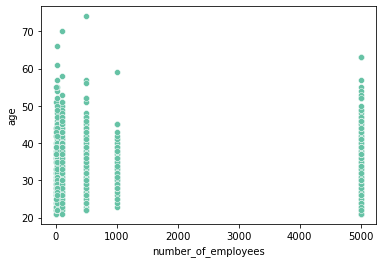

In [ ]:
# Scatter plot to how relation
sns.scatterplot(x="number_of_employees", y="age", data=df_2016)

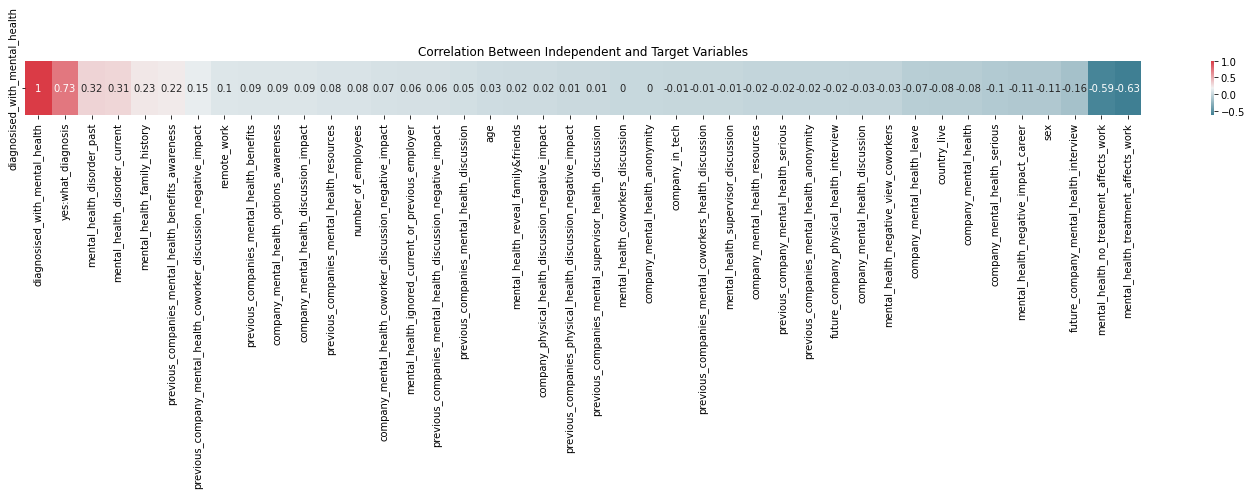

In [ ]:
# Correlation between response and predictors
f, ax = plt.subplots(figsize=(25, 1))
corr = df_2016.corr(method ='spearman')

treatment = corr.sort_values(by=['diagnosised_with_mental_health'], ascending=False).head(1).T
treatment = treatment.sort_values(by=['diagnosised_with_mental_health'],ascending=False).T
sns.heatmap(round(treatment,2), cmap=cmap, annot=True)
plt.title("Correlation Between Independent and Target Variables")
plt.show()

In [ ]:
# scaling the values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df_2016.drop(['diagnosised_with_mental_health'], axis=1))
X_scaled=scaler.transform(df_2016.drop(['diagnosised_with_mental_health'], axis=1))

In [ ]:
# performing PCA
from sklearn.decomposition import PCA
pca_2=PCA(n_components=28)
pca_2.fit(X_scaled)
pcas_stdsc=pca_2.transform(X_scaled)

In [ ]:
print(f'First 2 components of PCA without standardization are:{pcas_stdsc}')

First 2 components of PCA without standardization are:[[-3.012017   -1.96222917 -1.37871115 ...  1.25190207 -0.82702015
   0.75918275]
 [ 0.28700923 -0.49322308 -2.07232284 ...  0.66920267  0.32342902
  -0.01855095]
 [-0.35454837 -0.61353844  0.0323778  ...  1.03487404 -0.76179937
   0.85628695]
 ...
 [ 1.20907854  0.67986407 -1.19201916 ...  0.77088002  0.84242061
  -1.27797752]
 [ 3.0090246   0.24010944  1.17673787 ... -0.20523839 -0.53084001
  -0.80297095]
 [-0.49920364  2.08366522 -1.40079889 ...  0.03217914 -0.37008019
  -0.06698942]]


In [ ]:
print(f'Variances proportion of the First 2 principal components with standardization are: { pca_2.explained_variance_ratio_*100}')

Variances proportion of the First 2 principal components with standardization are: [8.20786226 7.53197547 5.34811744 4.55373202 3.97499989 3.66982617
 3.19551541 3.0442498  2.99910721 2.79335736 2.7292515  2.71192916
 2.53163536 2.48702443 2.42176156 2.37912352 2.27632032 2.20886571
 2.12412519 2.06810857 2.03788887 1.94786699 1.9114138  1.84223579
 1.7966001  1.75177211 1.68377274 1.61931333]


In [ ]:
sum(pca_2.explained_variance_ratio_*100)

83.84775208583449

In [ ]:
df_2016.shape

(1015, 42)

In [ ]:
sums=[]
for i in range(1,42):
    pca_2=PCA(n_components=i)
    pca_2.fit(X_scaled)
    pcas_stdsc=pca_2.transform(X_scaled)
    sums.append(sum(pca_2.explained_variance_ratio_*100))

Text(0, 0.5, 'Sum of Variance in Percentage')

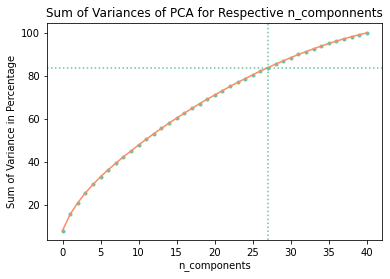

In [ ]:
# plotting the PCA graph for number of components and the percentage retained
plt.plot(sums,'.')
plt.plot(sums)
plt.axvline(x=27,linestyle = ':')
plt.axhline(y=83.86562893420613,linestyle = ':')
plt.title("Sum of Variances of PCA for Respective n_componnents")
plt.xlabel("n_components")
plt.ylabel("Sum of Variance in Percentage")